In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Example PCB 1 (Linear Regression Summary)

The aim of this example (Bates and Watts, 1988, p. 3) is to present linear regression estimation can be performed properly using different methods.

In [2]:
df = pd.DataFrame()
df['Age (years)'] = [1, 1 ,1 ,1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 11, 12, 12, 12]
df['PCB Conc. (ppm)'] = [0.6, 1.6, 0.5, 1.2, 2.0, 1.3, 2.5, 2.2, 2.4, 1.2, 3.5, 4.1, 5.1, 5.7, 3.4, 9.7, 
                         8.6, 4.0, 5.5, 10.5, 17.5, 13.4, 4.5, 30.4, 12.4, 13.4, 26.2, 7.4]

In [3]:
df.head(5)

,Age (years),PCB Conc. (ppm)
0,1,0.6
1,1,1.6
2,1,0.5
3,1,1.2
4,2,2.0


### Create an initial plot

Text(0, 0.5, 'PCB concentration (ppm)')

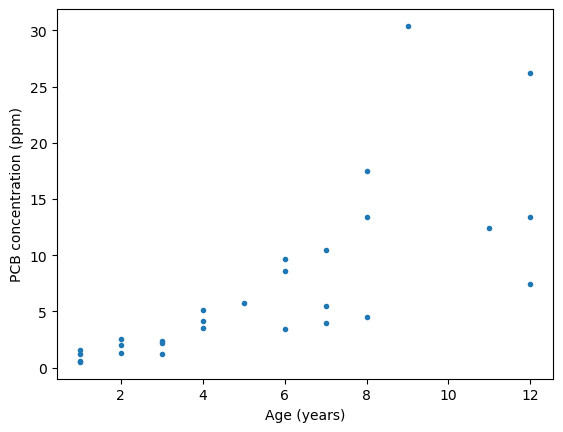

In [4]:
plt.plot((df['Age (years)']).values, (df['PCB Conc. (ppm)']).values, '.')
plt.xlabel('Age (years)')
plt.ylabel('PCB concentration (ppm)')

### Adjustments

Plotting the PCB concentration on a logarithmic scale, nicely stabilizes the variance and produces a more nearly linear relationship.

Transforming the regressor variable can produce an even straighter plot, where we use the cube root of age.

In [5]:
x = np.log(df['Age (years)']).values
y = (df['PCB Conc. (ppm)']**(1/3)).values

A = np.vstack([x, np.ones(len(x))]).T

Text(0, 0.5, 'PCB concentration (ppm)')

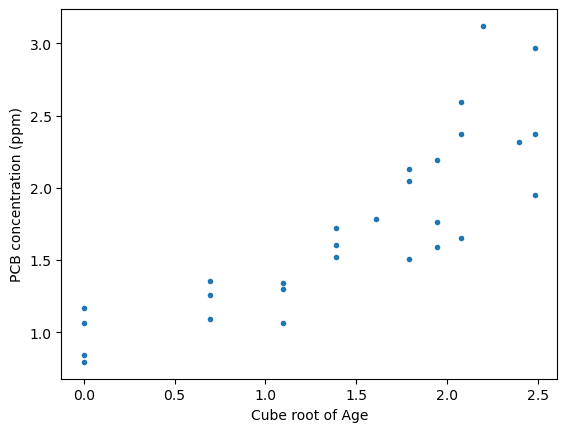

In [6]:
plt.plot(x, y, '.')
plt.xlabel('Cube root of Age')
plt.ylabel('PCB concentration (ppm)')

### Use optimize.curve_fit from scipy

This scipy function is actually very powerful, that it can fit not only linear functions, but many different function forms, such as non-linear function. 
Here we will show the linear example from above. Note that, using this function, we don’t need to turn y into a column vector.

In [7]:
popt, pcov = curve_fit(lambda x, a, b: a*x +b, x, y)

a, b = popt

### Use direct inverse method ###

In [8]:
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)), A.T)), y)

alpha

array([0.63576415, 0.80876588])

### Use the pseudoinverse ###

$ (A^TA)^{-1}A^T$ is called the pseudo-inverse, therefore, we could use the pinv function in numpy to directly calculate it.

In [9]:
y = y[:, np.newaxis]

In [10]:
pinv = np.linalg.pinv(A)
alpha = np.dot(pinv, y)

print(alpha)

[[0.63576415]
 [0.80876588]]


### Use numpy.linalg.lstsq

In [11]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]

print(alpha)

[[0.63576415]
 [0.80876588]]


Text(0, 0.5, 'PCB concentration (ppm)')

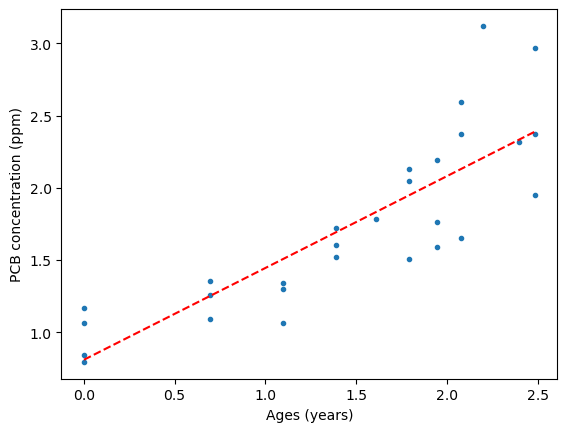

In [12]:
x = np.log(df['Age (years)']).values
y = (df['PCB Conc. (ppm)']**(1/3)).values

plt.plot(x, y, '.')
plt.plot(x, a*x + b, "r--")
plt.xlabel('Ages (years)')
plt.ylabel('PCB concentration (ppm)')